In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, list_available_datasets
from scipy.stats import zscore

In [2]:
# check which datasets must be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
# import data 
dermatology = fetch_ucirepo(name = "dermatology") 

# check metadata 
print(dermatology.metadata)  

{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

In [4]:
# inspect data
X = dermatology.data.features
y = dermatology.data.targets

df = pd.DataFrame(X)
dft = pd.DataFrame(y)

In [5]:
# check column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   erythema                                     366 non-null    int64  
 1   scaling                                      366 non-null    int64  
 2   definite-borders                             366 non-null    int64  
 3   itching                                      366 non-null    int64  
 4   koebner phenomenon                           366 non-null    int64  
 5   polygonal papules                            366 non-null    int64  
 6   follicular papules                           366 non-null    int64  
 7   oral-mucosal involvement                     366 non-null    int64  
 8   knee elbow involvement                       366 non-null    int64  
 9   scalp involvement                            366 non-null    int64  
 10  fa

In [6]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   366 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [7]:
# descriptive statistics of the DataFrame
df.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


In [8]:
# check missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

age    8
dtype: int64


In [9]:
# check outliers
z_scores = df.apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
print("Outliers detected based on Z-score:\n", outliers.sum()) 

Outliers detected based on Z-score:
 erythema                                        4
scaling                                         0
definite-borders                                0
itching                                         0
koebner phenomenon                              0
polygonal papules                               0
follicular papules                             22
oral-mucosal involvement                       13
knee elbow involvement                          0
scalp involvement                               0
family history                                  0
melanin incontinence                            0
eosinophils in the infiltrate                   9
pnl infiltrate                                  7
fibrosis of the papillary dermis               23
exocytosis                                      0
acanthosis                                      0
hyperkeratosis                                  5
parakeratosis                                   0
clubbing of t

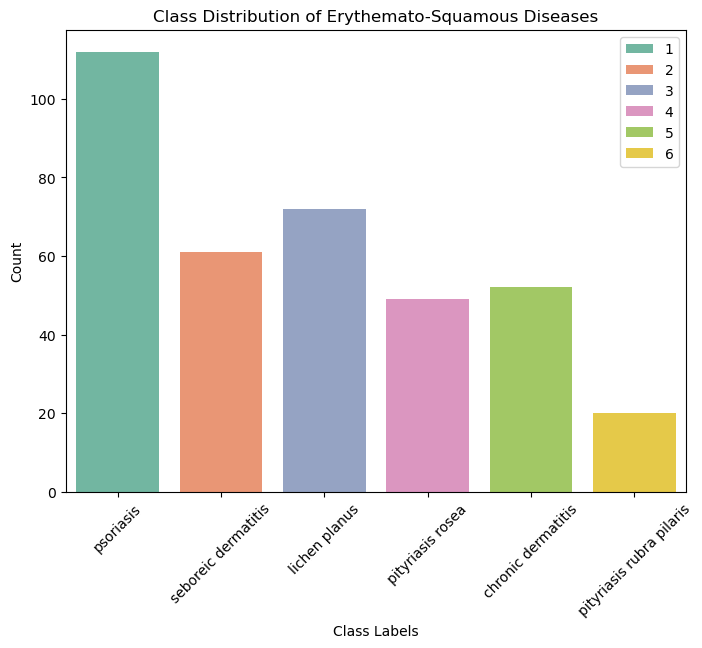

In [10]:
# visualize class label distribution
target_names = ['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea',
                'chronic dermatitis', 'pityriasis rubra pilaris']

y = dermatology.data.targets
if isinstance(y, pd.DataFrame):
    y = y.to_numpy().ravel()  
else:
    y = y.ravel()   

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2", hue=y)

plt.title("Class Distribution of Erythemato-Squamous Diseases")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.xticks(ticks=range(len(target_names)), labels=target_names, rotation=45)
plt.show()

In [11]:
# Check skewness for all features
skewed_features = df.skew()
skewed_features = skewed_features[skewed_features > 1]
print("Skewed Features:\n", skewed_features)

Skewed Features:
 koebner phenomenon                             1.186696
polygonal papules                              1.806647
follicular papules                             3.557368
oral-mucosal involvement                       1.960748
knee elbow involvement                         1.234204
scalp involvement                              1.455928
family history                                 2.267683
melanin incontinence                           1.878663
eosinophils in the infiltrate                  3.082562
pnl infiltrate                                 1.221281
fibrosis of the papillary dermis               2.356894
hyperkeratosis                                 1.220889
clubbing of the rete ridges                    1.180687
thinning of the suprapapillary epidermis       1.240996
spongiform pustule                             2.314058
munro microabcess                              2.034064
focal hypergranulosis                          1.927848
disappearance of the granular 

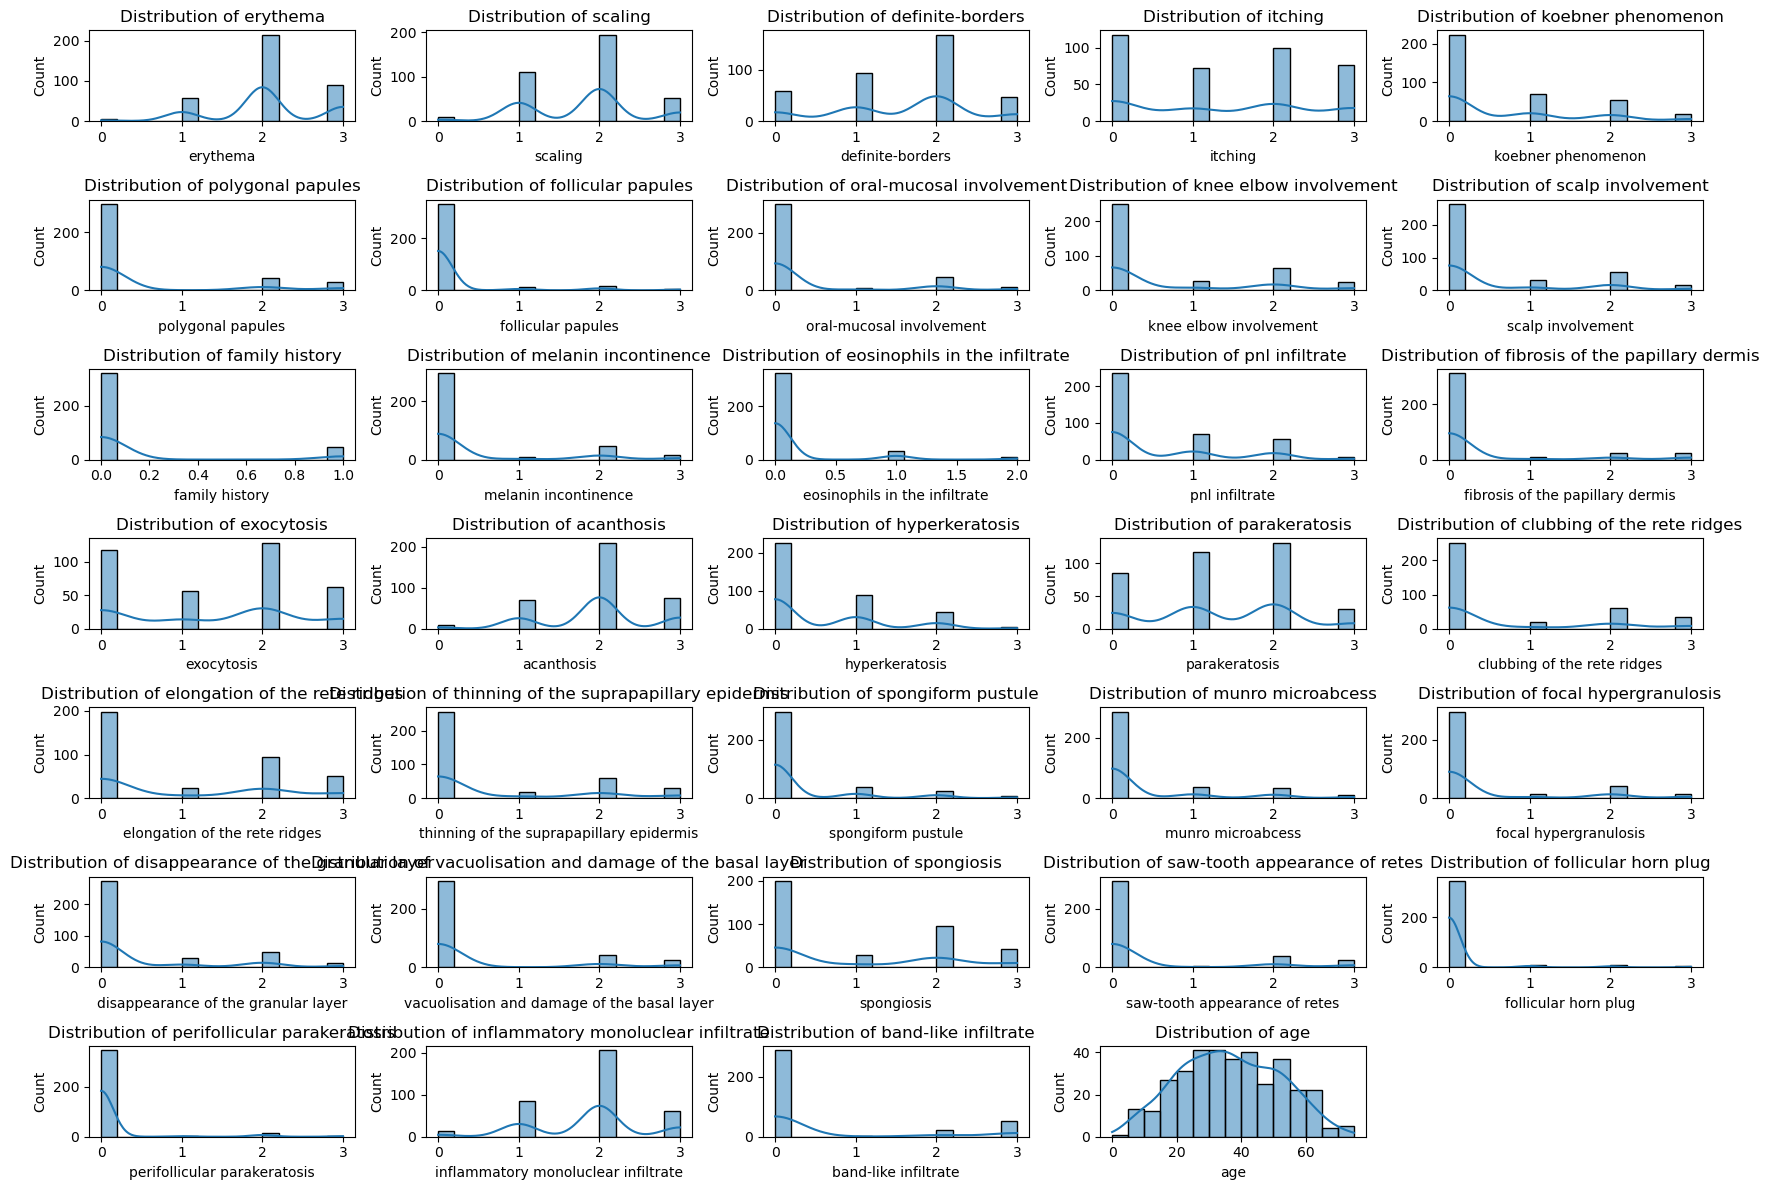

In [12]:
# analyze feature distribution (Histograms)
plt.figure(figsize=(17, 12))

for i, feature in enumerate(df.columns, 1):
    plt.subplot(7, 5, i) 
    sns.histplot(df[feature], kde=True, bins=15)  
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

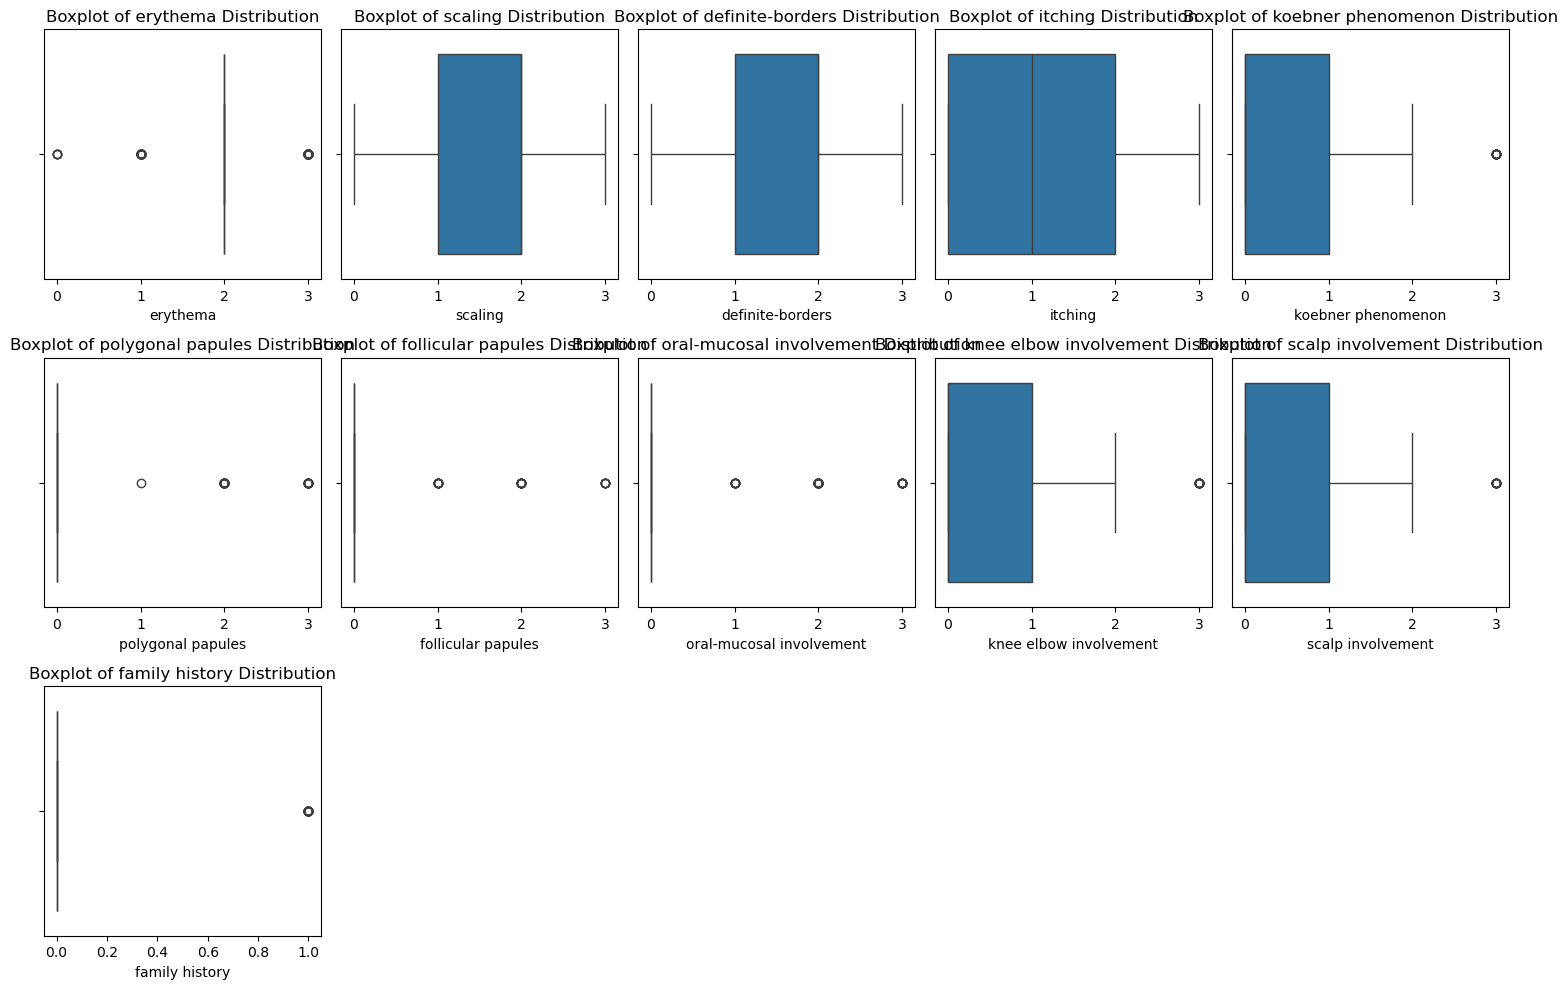

In [13]:
# Analyze feature distribution (Boxplots - clinical attributes)
clinical_features = ['erythema', 'scaling', 'definite-borders', 'itching', 'koebner phenomenon', 
                        'polygonal papules', 'follicular papules', 'oral-mucosal involvement', 'knee elbow involvement', 
                        'scalp involvement', 'family history']  

plt.figure(figsize=(15, 10))

for i, feature in enumerate(clinical_features, 1):
    plt.subplot(3, 5, i)  
    sns.boxplot(data=df, x=feature)  
    plt.title(f'Boxplot of {feature} Distribution')
    plt.tight_layout()

plt.show()

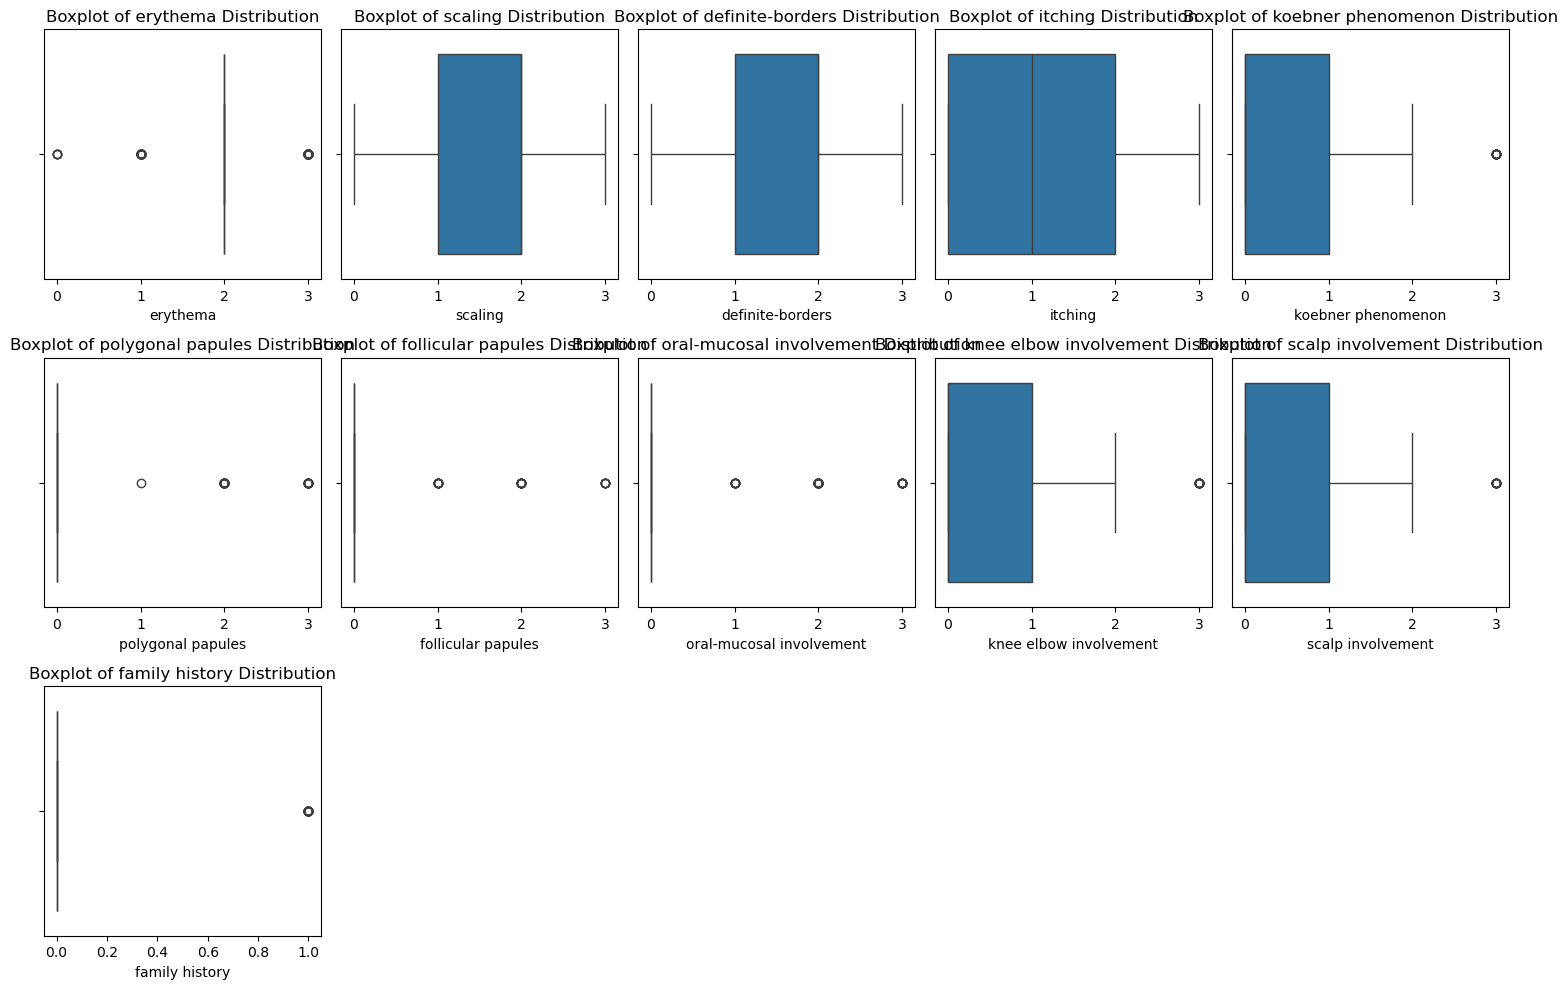

In [14]:
# analyze feature distribution (Boxplots- histopathological attributes)
histopathological_features = [
    'melanin incontinence', 'eosinophils in the infiltrate', 'pnl infiltrate', 
    'fibrosis of the papillary dermis', 'itching', 'koebner phenomenon', 
    'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 
    'clubbing of the rete ridges', 'elongation of the rete ridges', 
    'thinning of the suprapapillary epidermis', 'spongiform pustule', 
    'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 
    'vacuolisation and damage of the basal layer', 'spongiosis', 'saw-tooth appearance of retes', 
    'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate', 
    'band-like infiltrate'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(clinical_features, 1):
    plt.subplot(3, 5, i)  
    sns.boxplot(data=df, x=feature) 
    plt.title(f'Boxplot of {feature} Distribution')
    plt.tight_layout()

plt.show()

                          melanin incontinence  eosinophils in the infiltrate  \
erythema                              0.020489                       0.055165   
scaling                              -0.093918                      -0.009868   
definite-borders                      0.311427                      -0.143542   
itching                               0.376761                       0.102759   
koebner phenomenon                    0.363361                      -0.078266   
polygonal papules                     0.952971                       0.041371   
follicular papules                   -0.152091                      -0.085687   
oral-mucosal involvement              0.930872                       0.009058   
knee elbow involvement               -0.304296                      -0.211917   
scalp involvement                    -0.274355                      -0.096200   
family history                       -0.166093                      -0.111144   

                          p

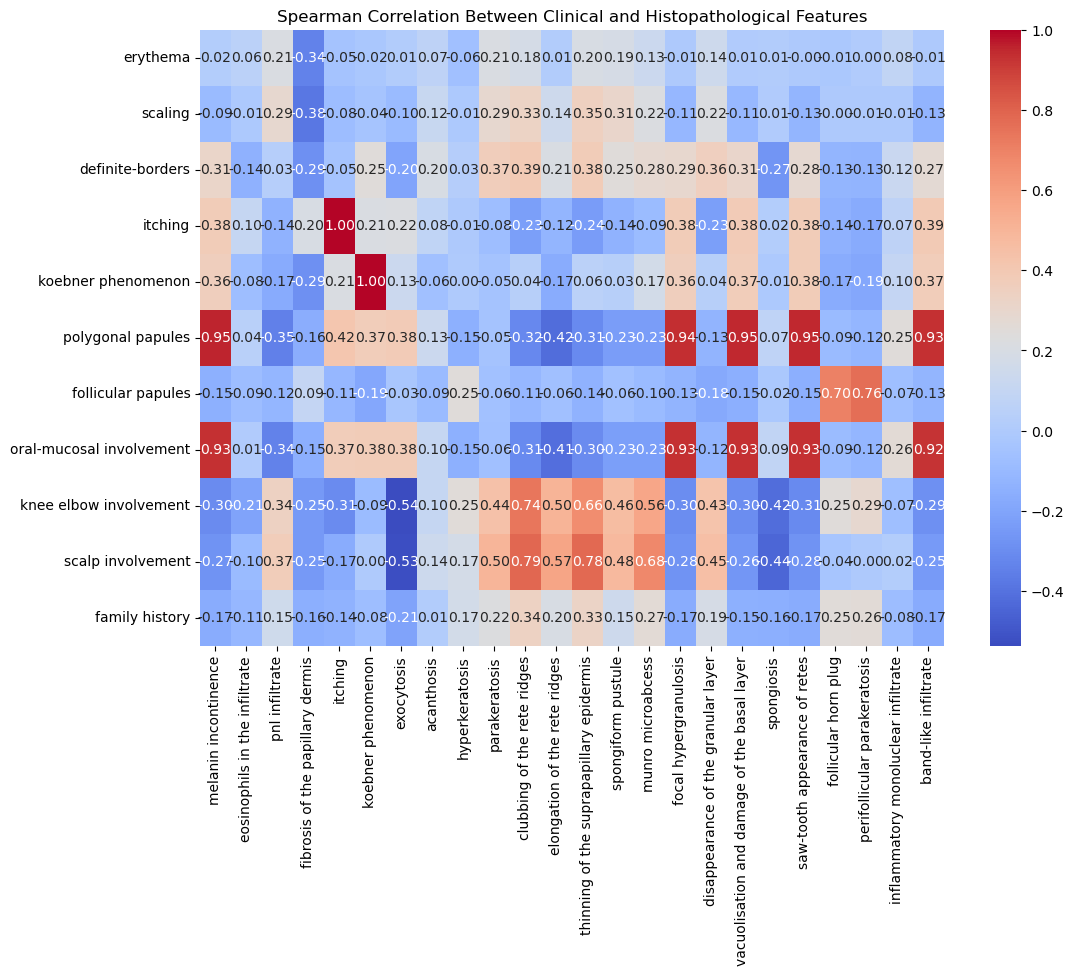

In [15]:
# Investigate the relationships between clinical and histopathological features.
clinical_features = df[['erythema', 'scaling', 'definite-borders', 'itching', 'koebner phenomenon', 
                        'polygonal papules', 'follicular papules', 'oral-mucosal involvement', 'knee elbow involvement', 
                        'scalp involvement', 'family history']]
histopathological_features = df[[
    'melanin incontinence', 'eosinophils in the infiltrate', 'pnl infiltrate', 
    'fibrosis of the papillary dermis', 'itching', 'koebner phenomenon', 
    'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 
    'clubbing of the rete ridges', 'elongation of the rete ridges', 
    'thinning of the suprapapillary epidermis', 'spongiform pustule', 
    'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 
    'vacuolisation and damage of the basal layer', 'spongiosis', 'saw-tooth appearance of retes', 
    'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate', 
    'band-like infiltrate']]

correlation_matrix = pd.DataFrame(index=clinical_features.columns, columns=histopathological_features.columns)

for clinical in clinical_features.columns:
    for histopathological in histopathological_features.columns:
        correlation_matrix.loc[clinical, histopathological] = df[clinical].corr(df[histopathological], method='spearman')

correlation_matrix = correlation_matrix.astype(float)

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Spearman Correlation Between Clinical and Histopathological Features")
plt.show()


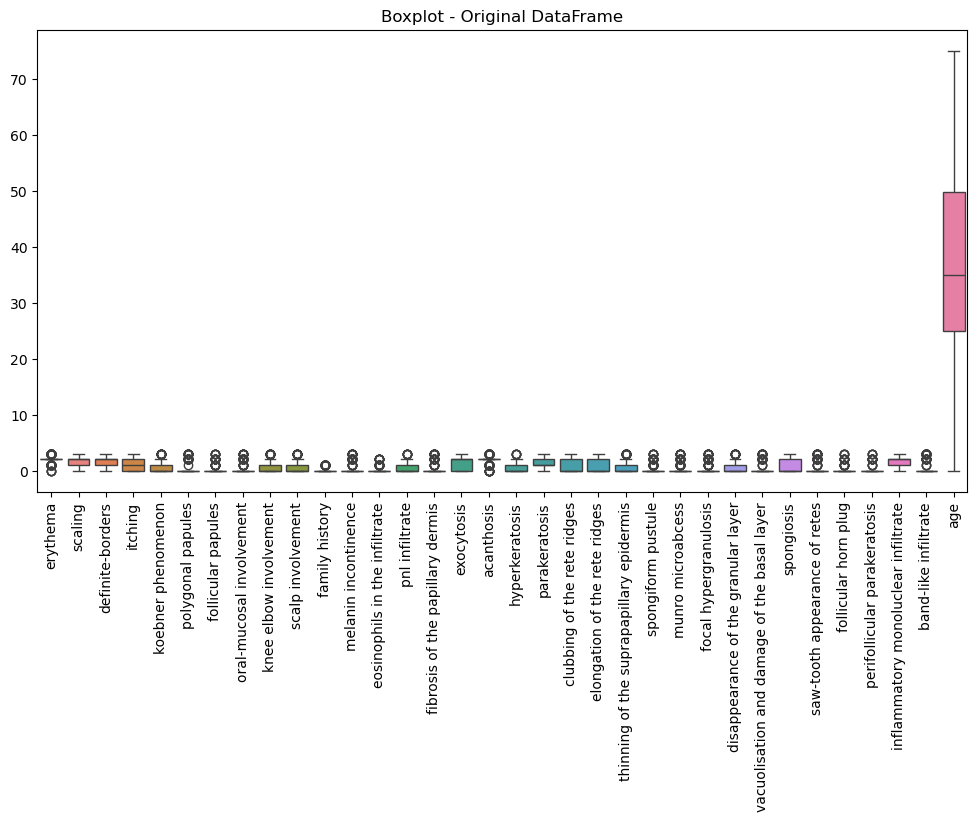

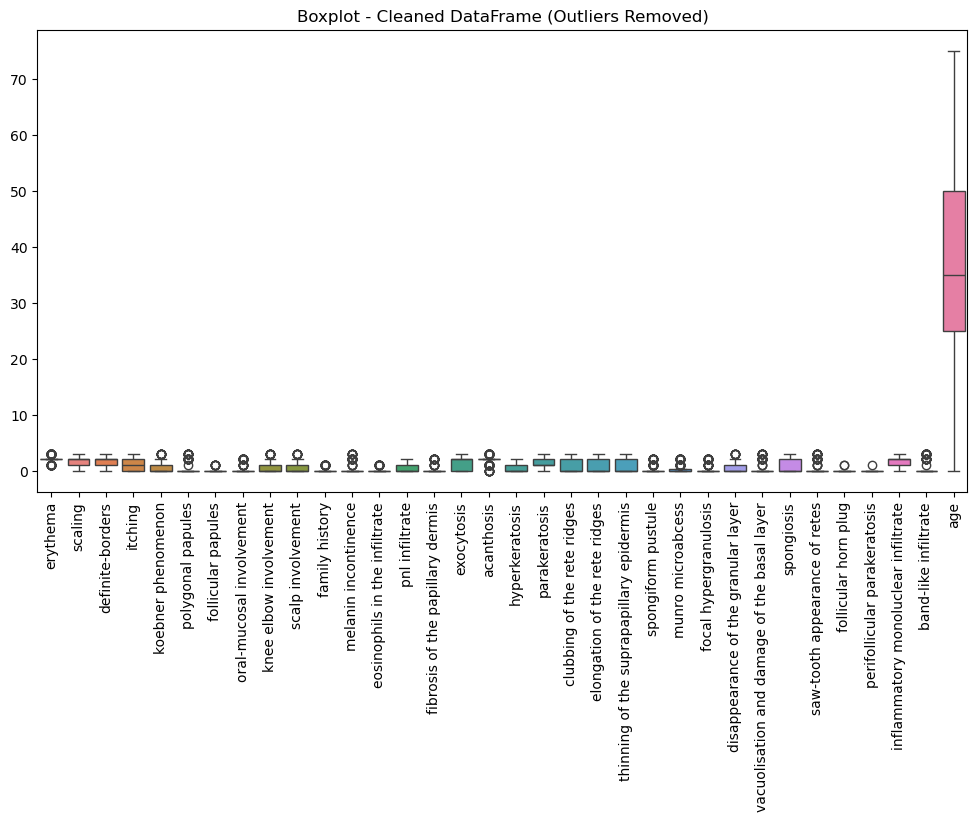

In [16]:
# analyzing outliers and compare with original df
numeric_df = df.select_dtypes(include=['float64', 'int64'])
z_scores = numeric_df.apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)

df_cleaned = df[~outliers.any(axis=1)]

# Visualize the original DataFrame (before removing outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot - Original DataFrame")
plt.xticks(rotation=90) 
plt.show()

# visualize the cleaned DataFrame (after removing outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.title("Boxplot - Cleaned DataFrame (Outliers Removed)")
plt.xticks(rotation=90) 
plt.show()